In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

%config InlineBackend.figure_format = 'retina'

In [15]:
colors = ['#d62728', '#4ec6a8', '#3777e3']  # DeepMind style: red, blue, cyan


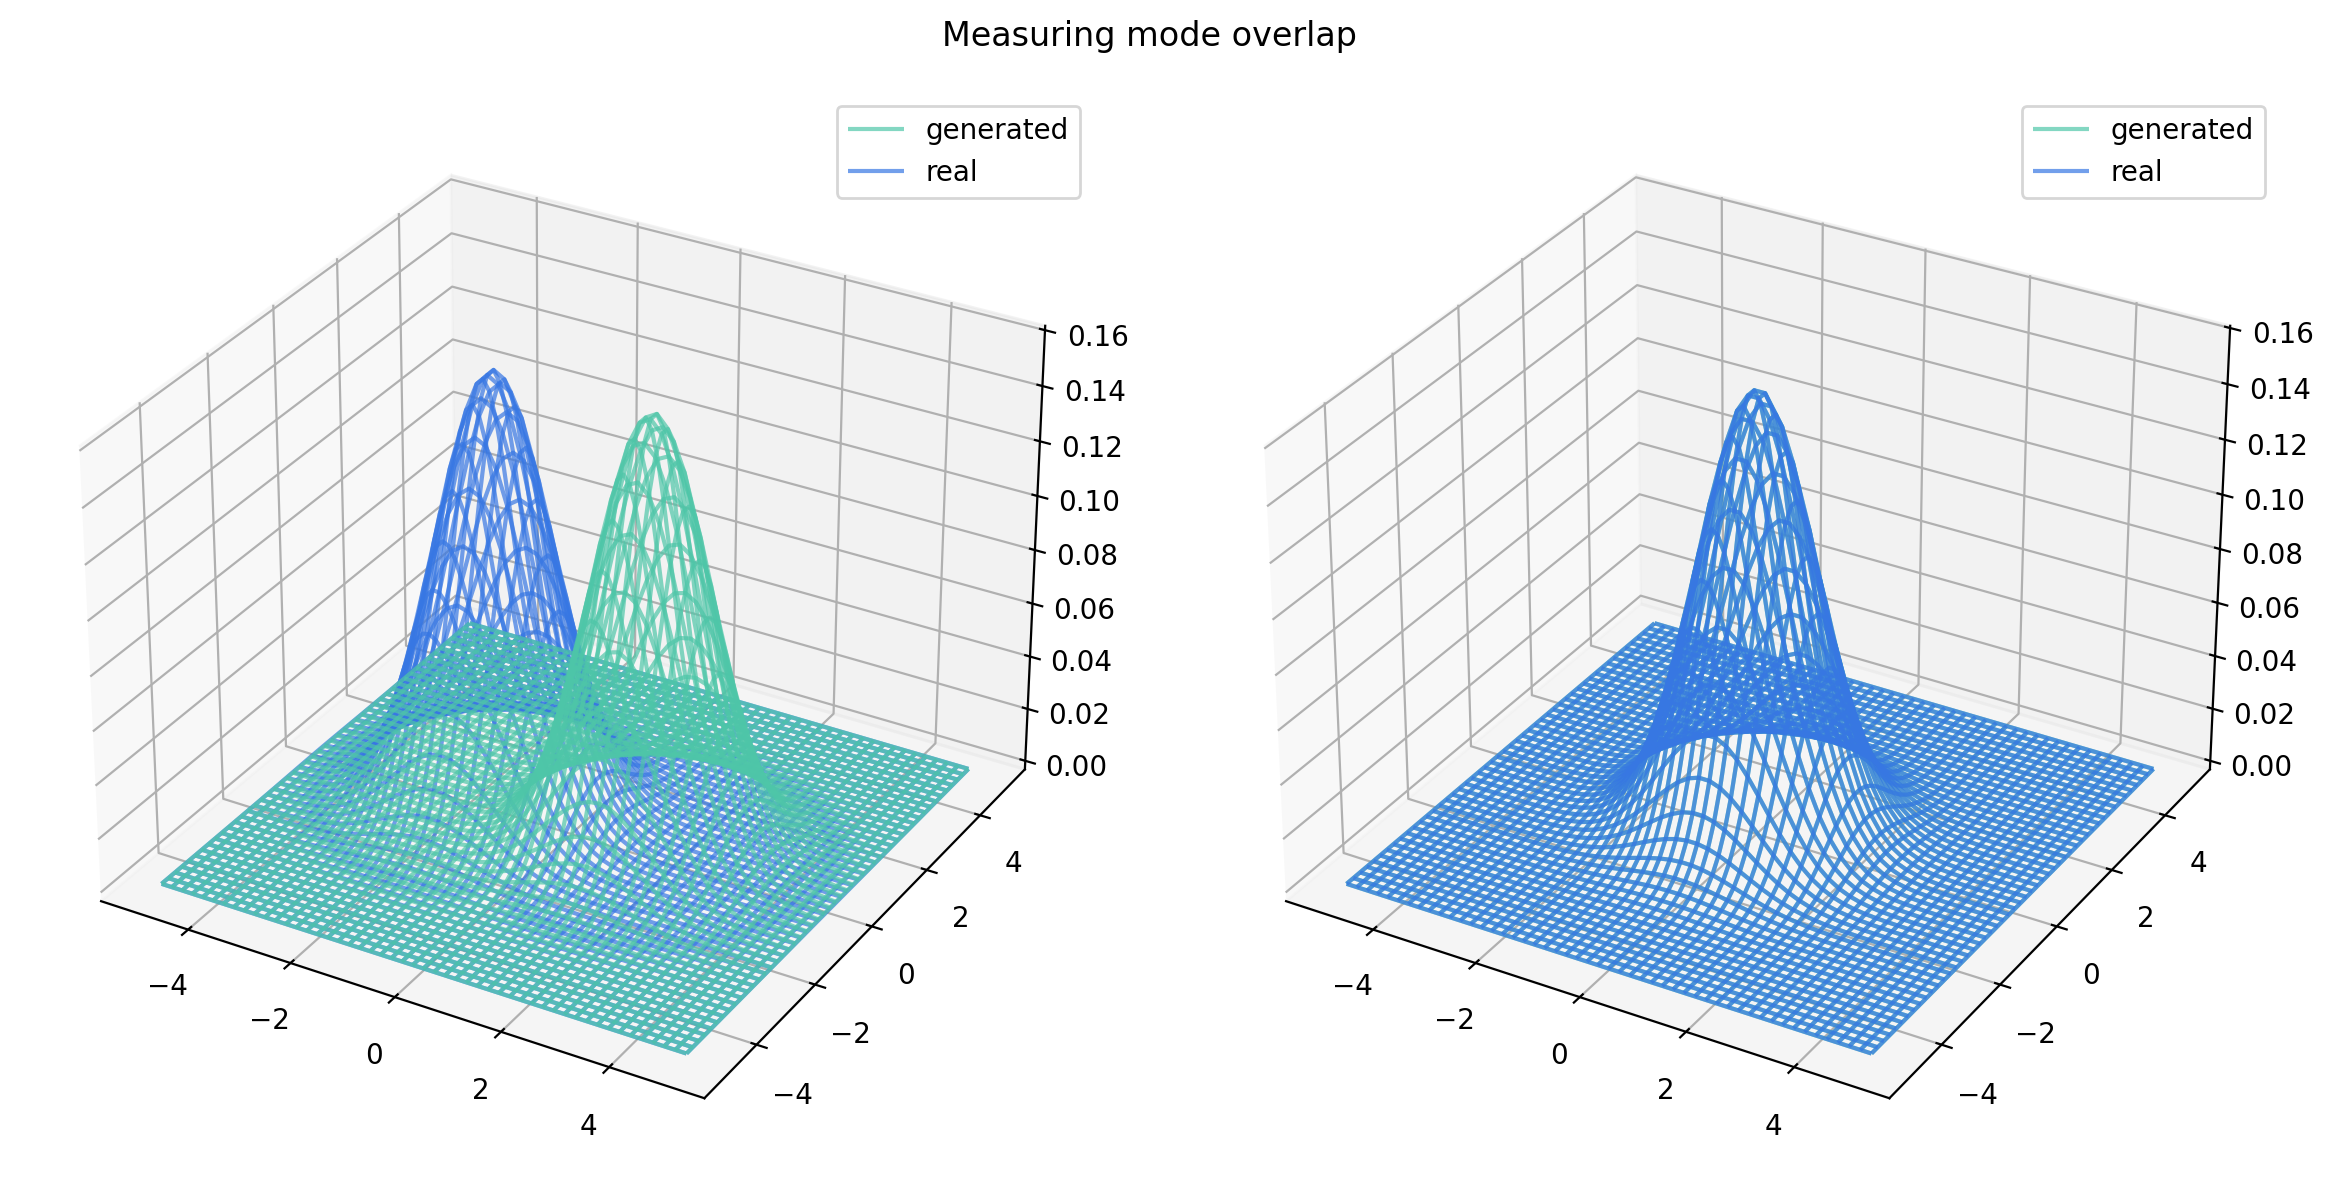

In [17]:
# 生成网格
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 定义高斯分布参数
# 左图：分布分离
mean_real_1 = [1.5, 0]
cov_real_1 = [[1, 0], [0, 1]]
mean_gen_1 = [-1.5, 0]
cov_gen_1 = [[1, 0], [0, 1]]

# 右图：分布重叠
mean_real_2 = [0, 0]
cov_real_2 = [[1, 0], [0, 1]]
mean_gen_2 = [0, 0]
cov_gen_2 = [[1, 0], [0, 1]]

fig = plt.figure(figsize=(12, 6))

# 左：分离
ax1 = fig.add_subplot(121, projection='3d')
rv_real_1 = multivariate_normal(mean_real_1, cov_real_1)
rv_gen_1 = multivariate_normal(mean_gen_1, cov_gen_1)
Z_real_1 = rv_real_1.pdf(pos)
Z_gen_1 = rv_gen_1.pdf(pos)
ax1.plot_wireframe(X, Y, Z_real_1, color=colors[1], alpha=0.7, label='real')
ax1.plot_wireframe(X, Y, Z_gen_1, color=colors[2], alpha=0.7, label='generated')
ax1.legend(['generated', 'real'])

# 右：重叠
ax2 = fig.add_subplot(122, projection='3d')
rv_real_2 = multivariate_normal(mean_real_2, cov_real_2)
rv_gen_2 = multivariate_normal(mean_gen_2, cov_gen_2)
Z_real_2 = rv_real_2.pdf(pos)
Z_gen_2 = rv_gen_2.pdf(pos)
ax2.plot_wireframe(X, Y, Z_real_2, color=colors[1], alpha=0.7, label='real')
ax2.plot_wireframe(X, Y, Z_gen_2, color=colors[2], alpha=0.7, label='generated')
ax2.legend(['generated', 'real'])

fig.suptitle('Measuring mode overlap')
plt.tight_layout()
plt.show()


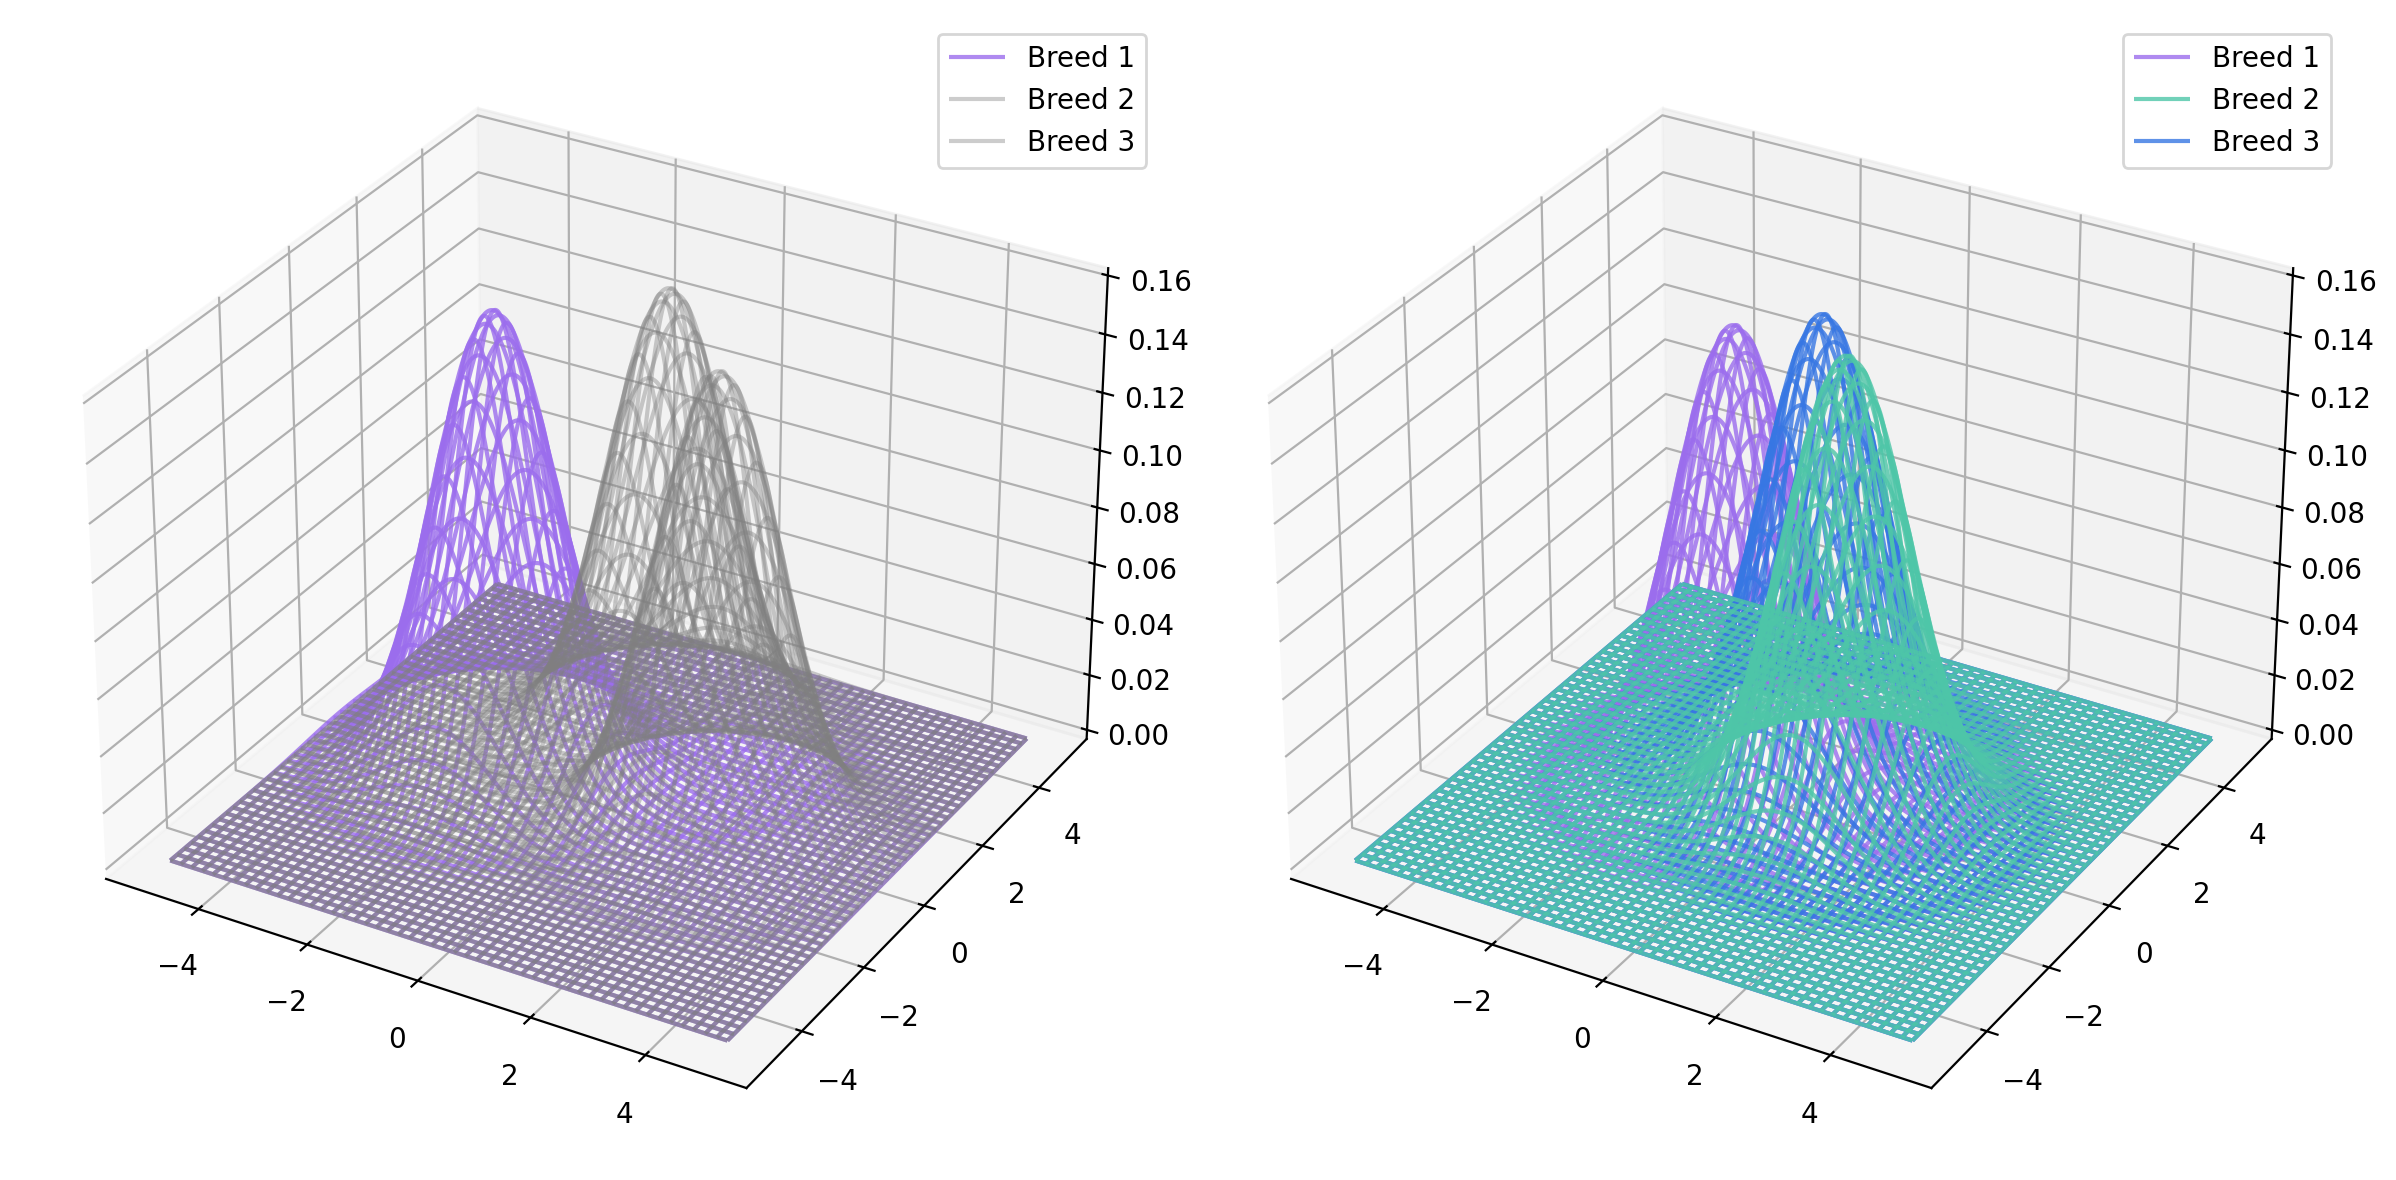

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# 生成网格
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 分布参数
means_sep = [[-2, 0], [2, 0], [0, 2]]
means_ovlp = [[-1, 0], [1, 0], [0, 1]]
covs = [
    [[1, 0], [0, 1]],
    [[1, 0], [0, 1]],
    [[1, 0], [0, 1]]
]

# DeepMind风格配色
colors = ['#9b6ded', '#4ec6a8', '#3777e3']
labels = ['Breed 1', 'Breed 2', 'Breed 3']

fig = plt.figure(figsize=(12, 6))

# 左图：分离
ax1 = fig.add_subplot(121, projection='3d')
for i in range(3):
    rv = multivariate_normal(means_sep[i], covs[i])
    Z = rv.pdf(pos)
    if i == 0:
        ax1.plot_wireframe(X, Y, Z, color=colors[i], alpha=0.8, label=labels[i])
    else:
        ax1.plot_wireframe(X, Y, Z, color='gray', alpha=0.4)
ax1.legend([labels[0], labels[1], labels[2]])

# 右图：重叠
ax2 = fig.add_subplot(122, projection='3d')
for i in range(3):
    rv = multivariate_normal(means_ovlp[i], covs[i])
    Z = rv.pdf(pos)
    ax2.plot_wireframe(X, Y, Z, color=colors[i], alpha=0.8, label=labels[i])
ax2.legend(labels)

plt.tight_layout()
plt.show()
